# Introduction

This project will investigate if there is a strong correlation between the economic output of a country and the life expectancy of its citizens.

The goals are to prepare data, followed by analysis with plots, and seek to explain the findings from the study.

Here are a few questions that this project will seek to answer:

+ Has life expectancy increased over time in the six nations?
+ Has GDP increased over time in the six nations?
+ Is there a correlation between GDP and life expectancy of a country?
+ What is the average life expectancy in these nations?
+ What is the distribution of that life expectancy?

**Data sources**

- GDP Source: [World Bank](https://data.worldbank.org/indicator/NY.GDP.MKTP.CD) national accounts data, and OECD National Accounts data files.

- Life expectancy Data Source: [World Health Organization](http://apps.who.int/gho/data/node.main.688)

In [2]:
#goal:
#Has life expectancy increased over time in the six nations?
#Has GDP increased over time in the six nations?
#Is there a correlation between GDP and life expectancy of a country?
#What is the average life expectancy in these nations?
#What is the distribution of that life expectancy?

#year: 2000 to 2005
#Country: 'Chile', 'China', 'Germany', 'Mexico', 'United States of America', 'Zimbabwe'
#GDP - Gross Domestic Product in U.S. dollars

## Import Python Modules

First import the preliminary modules that will be used in this project:

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Loading the Data

To look for connections between GDP and life expectancy load the datasets into DataFrames so that they can be visualized.

Here **data.2021.csv** will be read in into a DataFrame called `data`, followed by a quick inspection of the DataFrame using `.head()` to check its contents.

In [21]:
data =pd.read_csv('data.2021.csv')
print(data.head())


  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                            76.870  7.824988e+10
1   Chile  2001                            76.773  7.151727e+10
2   Chile  2002                            77.445  7.029523e+10
3   Chile  2003                            77.387  7.650785e+10
4   Chile  2004                            77.616  9.907937e+10
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           132 non-null    object 
 1   Year                              132 non-null    int64  
 2   Life expectancy at birth (years)  132 non-null    float64
 3   GDP                               132 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 4.2+ KB
None
['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zim

## Explore the Data

First, more needs to be explored about the countries that are represented in `data`. There seems to be six countries, Chile, China, Germany, Mexico, the US, and Zimbabwe represented in the data.

In [ ]:
print(data.Country.unique())

The next step is to find out which years are represented in the data, and they are 2000-2021.

In [ ]:
print(data.Year.unique())

Now, is possibile to analys some information of the `data` like if there are any Not A Number (nan) values in the dataframe and how many, how many observation are in the dataframe and what is the type of the values of the single column. In this dataframe  there are 132 observations with no nan values, `Contry` as the data type of **string**, `Year` as **integer** and `GDP` and `Life expectancy at birth (years)` as **floats**.

In [ ]:
print(data.info())

#### Cleaning Column Name

Looking over the data, there are inconsistencies with the column names. For example, the first two column names are one word each, while the third is five words long! `Life expectancy at birth (years)` is descriptive, which will be good for labeling the axis, but a little difficult to wrangle for coding the plot itself. The `rename` function is used to change the column name to `Life`.
The country name `United Stated of America` in the **Country** column will be changed in `USA` to be moer easy to call function and methods on it.

In [5]:
data = data.rename(columns={'Life expectancy at birth (years)': 'Life'})
data = data.replace(to_replace= 'United States of America', value= 'USA')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  132 non-null    object 
 1   Year     132 non-null    int64  
 2   Life     132 non-null    float64
 3   GDP      132 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 4.2+ KB


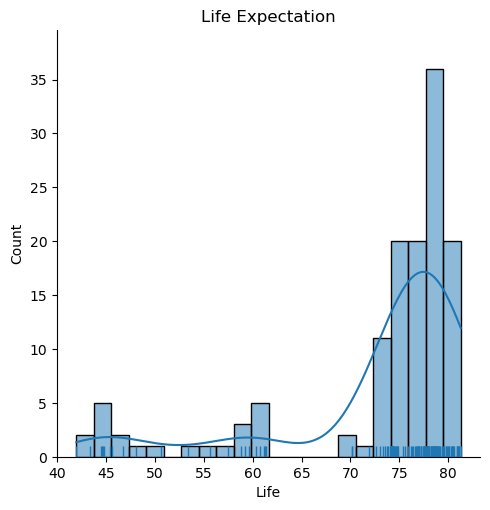

In [6]:
sns.displot(data = data, x = 'Life', kde = True, rug = True)
plt.title('Life Expectation')
plt.show()

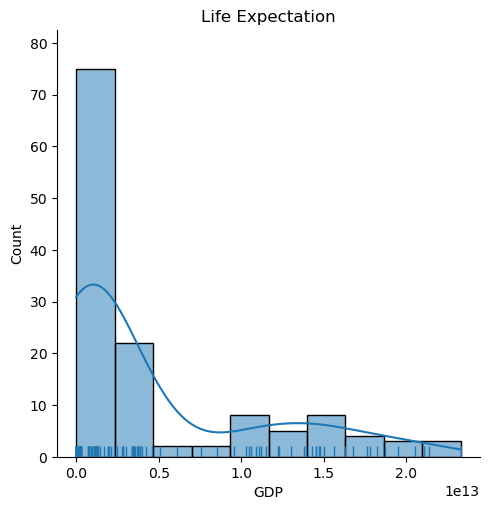

In [7]:
sns.displot(data = data, x = 'GDP', kde = True, rug = True)
plt.title('Life Expectation')
plt.show()

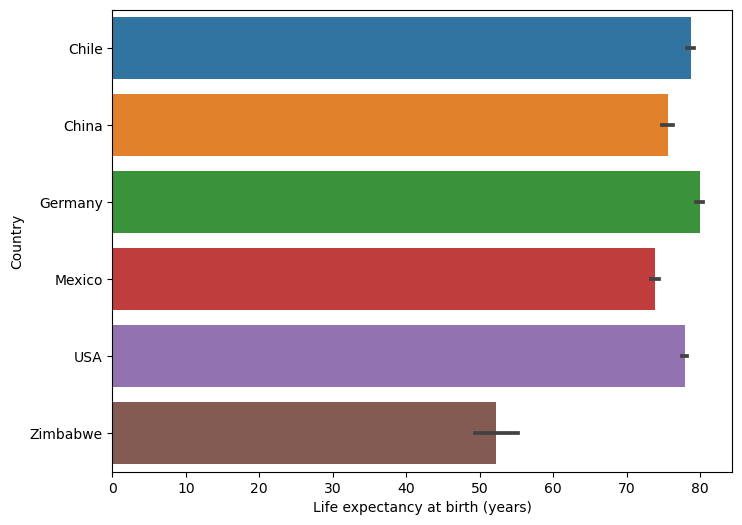

In [8]:
df = data.drop('Year', axis = 1)
plt.figure(figsize=(8,6))
sns.barplot(x="Life", y="Country", data=df)
plt.xlabel("Life expectancy at birth (years)");


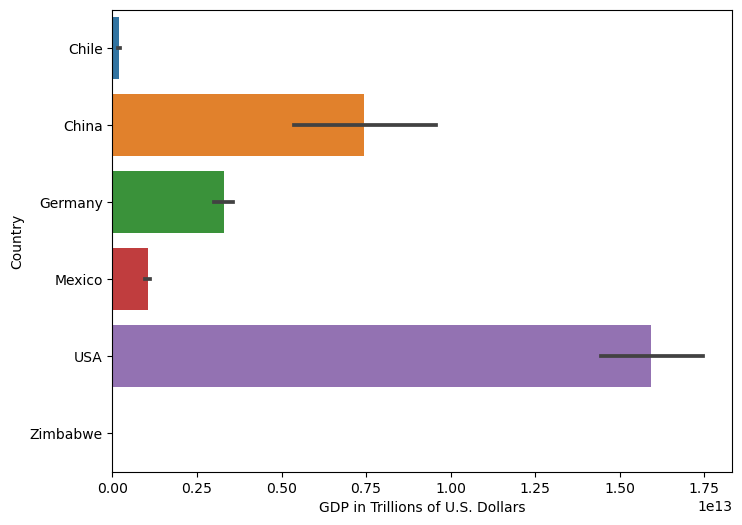

In [9]:
plt.figure(figsize=(8,6))
sns.barplot(x="GDP", y="Country", data=df)
plt.xlabel("GDP in Trillions of U.S. Dollars");

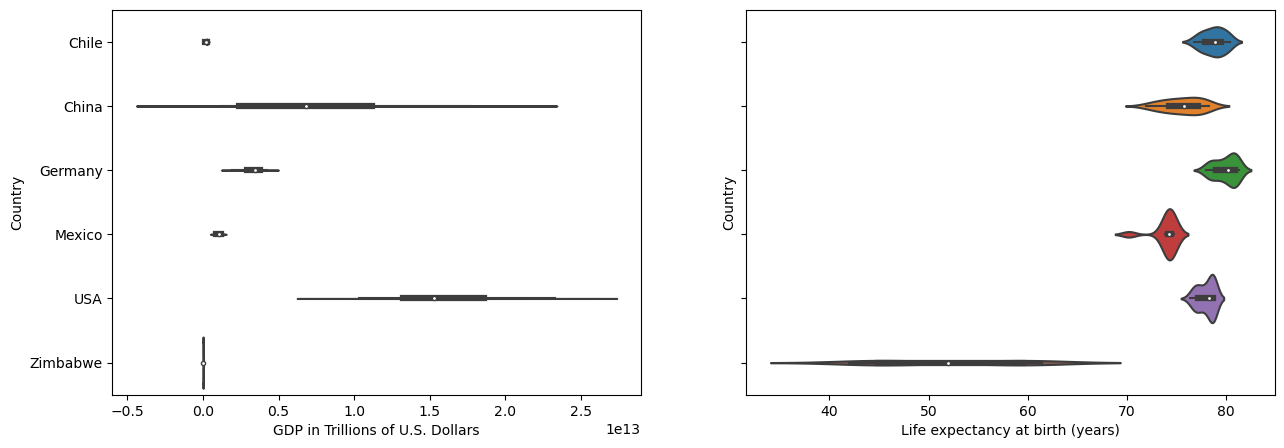

In [10]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(15, 5))
axes[0] = sns.violinplot(ax=axes[0], x=df.GDP, y=df.Country)
axes[0].set_xlabel("GDP in Trillions of U.S. Dollars")
axes[1] = sns.violinplot(ax=axes[1], x=df.Life, y=df.Country)
axes[1].set_xlabel("Life expectancy at birth (years)");

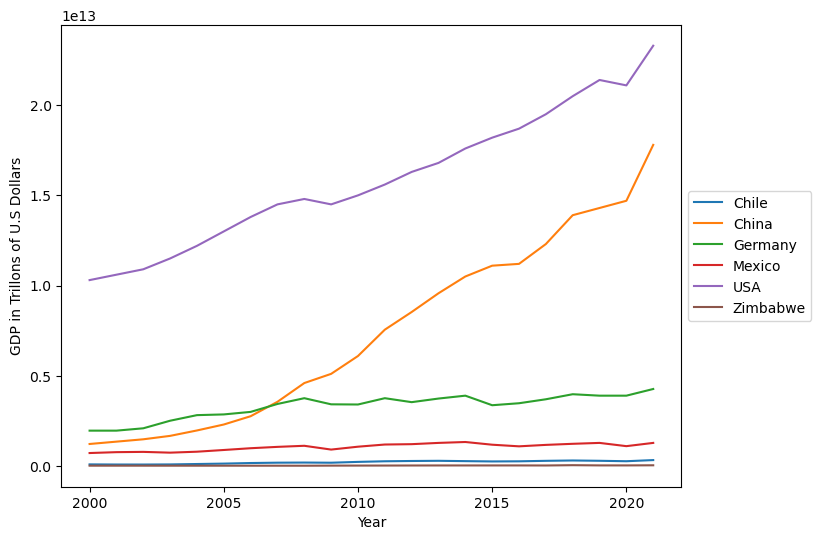

In [11]:
plt.figure(figsize = (8,6))
sns.lineplot(data = data, x = 'Year', y = 'GDP', hue = 'Country')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel("GDP in Trillons of U.S Dollars")
plt.show()

d:\Software\Anaconda3\envs\wit-python-ds\lib\site-packages\seaborn\axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
d:\Software\Anaconda3\envs\wit-python-ds\lib\site-packages\seaborn\axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
d:\Software\Anaconda3\envs\wit-python-ds\lib\site-packages\seaborn\axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
d:\Software\Anaconda3\envs\wit-python-ds\lib\site-packages\seaborn\axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
d:\Software\Anaconda3\envs\wit-python-ds\lib\site-packag

Text(0.5, 0.98, 'GDP by Country')

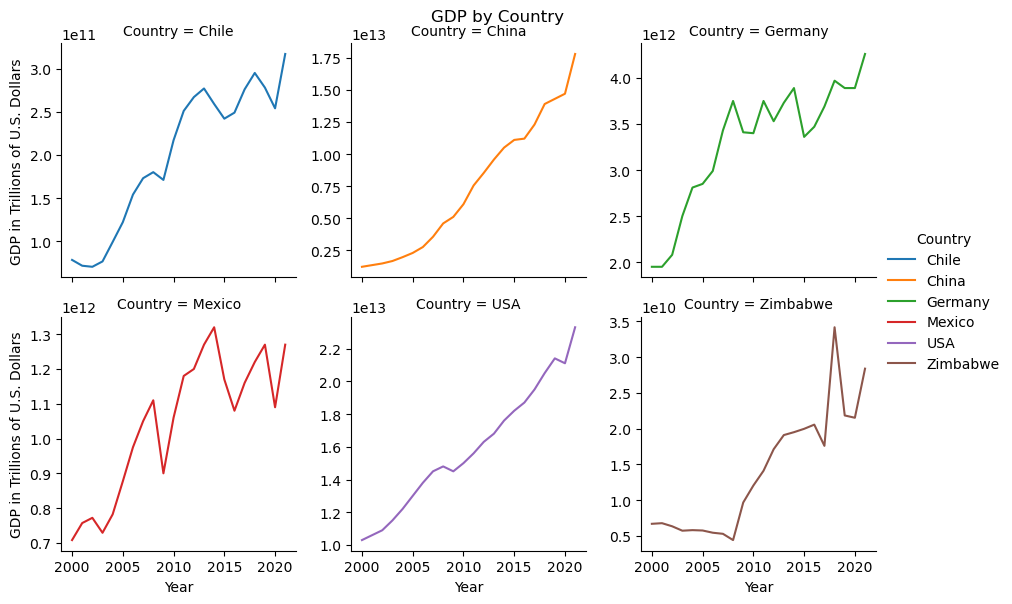

In [20]:
graphGDP = sns.FacetGrid(data, col="Country", col_wrap=3, hue = "Country", sharey = False)

graphGDP = (graphGDP.map(sns.lineplot,"Year","GDP").add_legend().set_axis_labels("Year","GDP in Trillions of U.S. Dollars"))
graphGDP.fig.suptitle ('GDP by Country', verticalalignment = 'baseline')

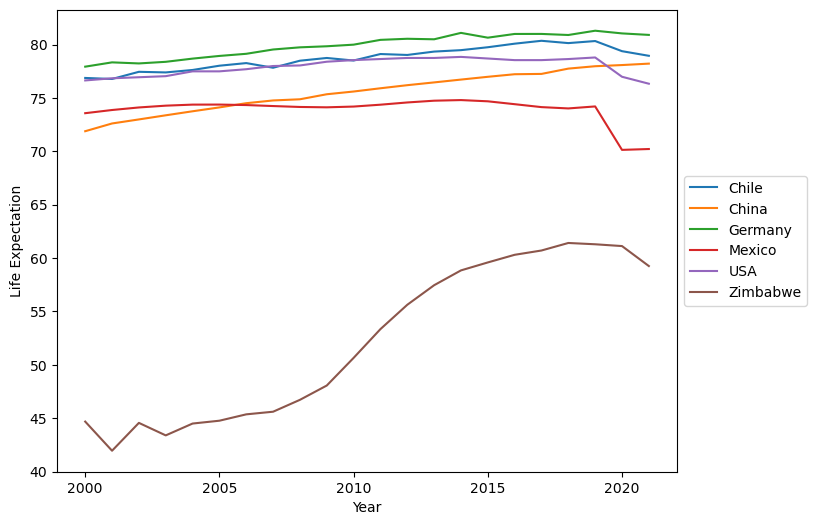

In [13]:
plt.figure(figsize = (8,6))
sns.lineplot(data = data, x = 'Year', y = 'Life', hue = 'Country')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel("Life Expectation")
plt.show()

d:\Software\Anaconda3\envs\wit-python-ds\lib\site-packages\seaborn\axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
d:\Software\Anaconda3\envs\wit-python-ds\lib\site-packages\seaborn\axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
d:\Software\Anaconda3\envs\wit-python-ds\lib\site-packages\seaborn\axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
d:\Software\Anaconda3\envs\wit-python-ds\lib\site-packages\seaborn\axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
d:\Software\Anaconda3\envs\wit-python-ds\lib\site-packag

Text(0.5, 0.98, 'GDP by Country')

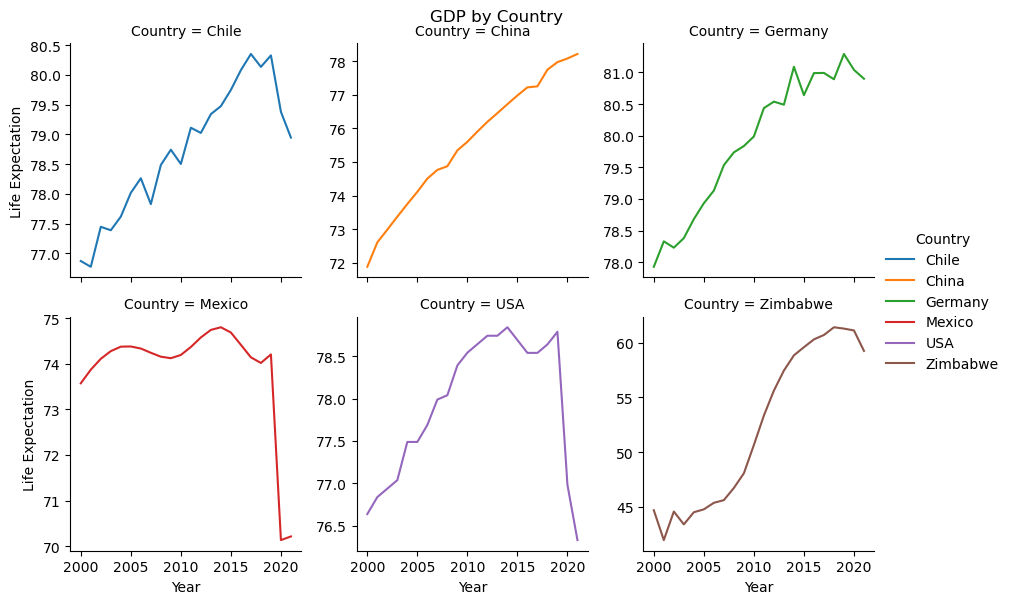

In [18]:
graphGDP = sns.FacetGrid(data, col="Country", col_wrap=3, hue = "Country", sharey = False)

graphGDP = (graphGDP.map(sns.lineplot,"Year","Life").add_legend().set_axis_labels("Year","Life Expectation"))
graphGDP.fig.suptitle ('Life Expectancy by Country', verticalalignment = 'baseline')

## Conclusion


- Has life expectancy increased over time in the six nations?
    - Yes, espacially in Zimbabwe  with an increise of 15 years.
- Has GDP increased over time in the six nations?
    - GDP increase as well, especially for China.
- Is there a correlation between GDP and life expectancy of a country?
    - Yes, there is a positive correlation.
- What is the average life expectancy in these nations?
    - The avarage life expectancy is between high 70's and early 80's while early 50's for Zimbabwe.
- What is the distribution of that life expectancy?
    - The distribution for the life expectancy is left skwed, with a lot of observetion on the right side of the plot.